# １-1 结构化数据建模流程

## 1.数据准备

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models,layers
import os,sys
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [21]:
#获取当前目录
os.getcwd()
os.path.abspath(os.path.dirname('__file__'))
#获取上级目录
os.path.abspath(os.path.dirname(os.path.dirname('__file__')))
os.path.abspath(os.path.dirname(os.getcwd()))
#获取上上级目录
os.path.abspath(os.path.join(os.getcwd(),'../..'))

'/home/pp/python_prj/tensorflow_learn/eat_tensorflow2_in_30_days/myNoteBook'

'/home/pp/python_prj/tensorflow_learn/eat_tensorflow2_in_30_days/myNoteBook'

'/home/pp/python_prj/tensorflow_learn/eat_tensorflow2_in_30_days/myNoteBook'

'/home/pp/python_prj/tensorflow_learn/eat_tensorflow2_in_30_days'

'/home/pp/python_prj/tensorflow_learn'

In [33]:
data_path = os.path.abspath(os.path.join(os.getcwd(),'../data/titanic/'))
data_path

'/home/pp/python_prj/tensorflow_learn/eat_tensorflow2_in_30_days/data/titanic'

In [34]:
dftrain_raw = pd.read_csv(os.path.abspath(os.path.join(data_path,'train.csv')))
dftest_raw = pd.read_csv(os.path.abspath(os.path.join(data_path,'test.csv')))
dftrain_raw.head(5)
dftest_raw.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5000,C30,S
1,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
2,388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0000,NaN,S
3,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S
4,687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S
1,405,0,3,"Oreskovic, Miss. Marija",female,20.00,0,0,315096,8.6625,NaN,S
2,635,0,3,"Skoog, Miss. Mabel",female,9.00,3,2,347088,27.9000,NaN,S
3,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.00,1,0,PC 17757,227.5250,C62 C64,C
4,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C


## 2.基本的数据分布统计

### 2.1 label分布情况

{0: 433, 1: 279} [433, 279]


Text(0,0.5,'Counts')

Text(0.5,0,'Survived')

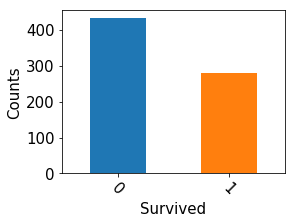

In [48]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
value_cnt = dftrain_raw['Survived'].value_counts()
value_cnt_list = value_cnt.tolist()
value_cnt_dir = value_cnt.to_dict()
print(value_cnt_dir,value_cnt_list)
ax = value_cnt.plot(kind='bar',figsize=(4,3),fontsize=15,rot=-45)
ax.set_ylabel('Counts',fontsize=15)
ax.set_xlabel('Survived',fontsize=15)
plt.show()

### 2.2 年龄分布情况

Text(0.5,0,'Age')

Text(0,0.5,'Frequency')

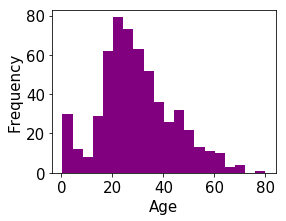

In [49]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
ax = dftrain_raw['Age'].plot(kind='hist',fontsize=15,figsize=(4,3),bins=20,color='purple')
ax.set_xlabel('Age',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
plt.show()

### 2.3 年龄与label的相关性

Text(0.5,0,'Age')

Text(0,0.5,'Density')

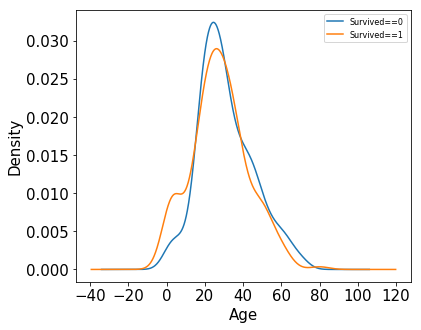

In [62]:
%matplotlib inline
%config InlineBackend.figure_format='png'
ax = dftrain_raw[(dftrain_raw['Survived']==0)]['Age'].plot(kind='density',fontsize=15,figsize=(6,5))
dftrain_raw[(dftrain_raw['Survived']==1)]['Age'].plot(kind='density',fontsize=15,figsize=(6,5))
ax.legend(['Survived==0', 'Survived==1'],fontsize=8)
ax.set_xlabel('Age',fontsize=15)
ax.set_ylabel('Density',fontsize=15)
plt.show()

## 3.数据预处理

In [69]:
def data_preprocessing(data):
    '''数据预处理操作'''
    result = pd.DataFrame()
    
    #pClass
    dfPclass = pd.get_dummies(data['Pclass'])
    dfPclass.columns = ['Pclass_' + str(x) for x in dfPclass.columns]
    result = pd.concat([result,dfPclass],axis=1)
    
    #Sex
    dfsex = pd.get_dummies(data['Sex'])
    result = pd.concat([result,dfsex],axis=1)
    
    #Age
    result['Age'] = data['Age'].fillna(0)
    #年龄是否为空
    result['Age_null'] = pd.isna(data['Age']).astype('int32')
    
    #Sibsp,Parch,Fare
    result['SibSp'] = data['SibSp']
    result['Parch'] = data['Parch']
    result['Fare'] = data['Fare']
    
    #Cabin，是否缺失
    result['Cabin_null'] = pd.isna(data['Cabin']).astype('int32')
    
    #Embarked
    dfEmbarked = pd.get_dummies(data['Embarked'],dummy_na=True)
    dfEmbarked.columns = ['Embarked' + str(x) for x in dfEmbarked.columns]
    result = pd.concat([result,dfEmbarked],axis=1)
    
    print(result.columns)
    return result

x_train = data_preprocessing(dftrain_raw)
y_train = dftrain_raw.Survived.values

x_test = data_preprocessing(dftest_raw)
y_test = dftest_raw.Survived.values
print('x_train shape = ',x_train.shape)
print('x_test shape = ',x_test.shape)

Index(['Pclass_1', 'Pclass_2', 'Pclass_3', 'female', 'male', 'Age', 'Age_null',
       'SibSp', 'Parch', 'Fare', 'Cabin_null', 'EmbarkedC', 'EmbarkedQ',
       'EmbarkedS', 'Embarkednan'],
      dtype='object')
Index(['Pclass_1', 'Pclass_2', 'Pclass_3', 'female', 'male', 'Age', 'Age_null',
       'SibSp', 'Parch', 'Fare', 'Cabin_null', 'EmbarkedC', 'EmbarkedQ',
       'EmbarkedS', 'Embarkednan'],
      dtype='object')
x_train shape =  (712, 15)
x_test shape =  (179, 15)


# 4.定义模型

## 4.1　采用Sequential按照层的方向构建模型

In [71]:
tf.keras.backend.clear_session()

model = models.Sequential()
model.add(layers.Dense(20,activation='relu',input_shape=(15,)))
model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


## 4.2　训练model

In [87]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['AUC'])
history = model.fit(x_train,y_train,batch_size=64,epochs=30,validation_split=0.2)

Train on 569 samples, validate on 143 samples
Epoch 1/30
569/569 [==============================] - 0s 692us/sample - loss: 0.3141 - AUC: 0.9217 - val_loss: 0.6803 - val_AUC: 0.8073
Epoch 2/30
569/569 [==============================] - 0s 57us/sample - loss: 0.3102 - AUC: 0.9205 - val_loss: 0.6822 - val_AUC: 0.8038
Epoch 3/30
569/569 [==============================] - 0s 56us/sample - loss: 0.3101 - AUC: 0.9241 - val_loss: 0.6882 - val_AUC: 0.8019
Epoch 4/30
569/569 [==============================] - 0s 56us/sample - loss: 0.3109 - AUC: 0.9223 - val_loss: 0.6676 - val_AUC: 0.8038
Epoch 5/30
569/569 [==============================] - 0s 56us/sample - loss: 0.3092 - AUC: 0.9235 - val_loss: 0.6950 - val_AUC: 0.8000
Epoch 6/30
569/569 [==============================] - 0s 57us/sample - loss: 0.3033 - AUC: 0.9248 - val_loss: 0.6707 - val_AUC: 0.8052
Epoch 7/30
569/569 [==============================] - 0s 55us/sample - loss: 0.3031 - AUC: 0.9248 - val_loss: 0.6763 - val_AUC: 0.8034
Epoch 8/

# 5.模型评估

## 5.1 模型在训练集和验证集上效果

In [82]:
%matplotlib inline
%config InlineBackend.figure_format= 'svg'

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_' + metric]
    epochs = range(1, len(train_metrics) + 1)
    
    plt.plot(epochs,train_metrics, 'bo--')
    plt.plot(epochs,val_metrics,'ro-')
    plt.title('Training and validation ' + metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend(['train_'+metric,'val_'+metric])
    plt.show()

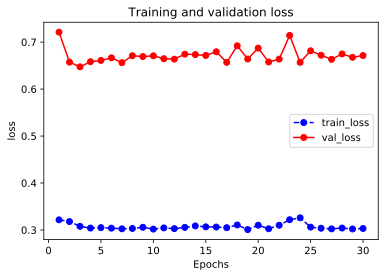

In [85]:
plot_metric(history=history,metric='loss')

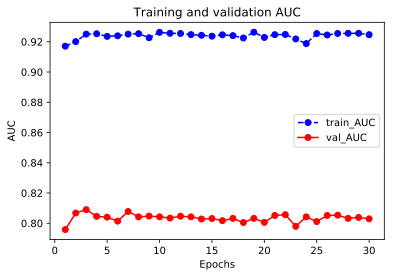

In [86]:
plot_metric(history,'AUC')

In [88]:
model.evaluate(x=x_test,y=y_test)

179/179 [==============================] - 0s 103us/sample - loss: 0.6146 - AUC: 0.8175


[0.614613620595559, 0.8174603]

# 6．使用模型

In [89]:
model.predict(x_test[:10])

array([[0.03225802],
       [0.8869725 ],
       [0.32528108],
       [0.99864906],
       [0.87512034],
       [0.8699132 ],
       [0.00869373],
       [0.9927779 ],
       [0.0771131 ],
       [0.10212076]], dtype=float32)

In [90]:
model.predict_classes(x_test[:10])

array([[0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0]], dtype=int32)

# 7.保存模型

## ７.1　keras方式保存，适合python环境恢复模型

In [92]:
#保存模型及权重
model.save('./../data/mnist_keras_model.h5')
del model

model = models.load_model('./../data/mnist_keras_model.h5')
model.evaluate(x_test,y_test)

179/179 [==============================] - 0s 610us/sample - loss: 0.6146 - AUC: 0.8175


[0.614613620595559, 0.8174603]

In [94]:
#保存模型结构
json_str = model.to_json()
model_json = models.model_from_json(json_str)

In [95]:
#保存模型权重
model.save_weights('./../data/mnist_keras_model_weight.h5')

#恢复模型结构
model_json = models.model_from_json(json_str)
model_json.compile(optimizer='adam',loss='binary_crossentropy',metrics=['AUC'])

#加载权重
model_json.load_weights('./../data/mnist_keras_model_weight.h5')
model_json.evaluate(x_test,y_test)

179/179 [==============================] - 0s 618us/sample - loss: 0.6146 - AUC: 0.8175


[0.614613620595559, 0.8174603]

## 7.2 Tesnsorflow原生方式保存

In [96]:
#保存权重，该方式仅保存权重张量
model.save_weights('./../data/mnist_tf_model_weight.ckpt',save_format='tf')

In [98]:
#保存模型结构与模型参数到文件，该方式保存的模型具有跨平台性便于部署
model.save('./../data/mnist_tf_model_savemodel',save_format='tf')
model_loaded = models.load_model('./../data/mnist_tf_model_savemodel')
model_loaded.evaluate(x_test,y_test)

INFO:tensorflow:Assets written to: ./../data/mnist_tf_model_savemodel/assets
179/179 [==============================] - 0s 626us/sample - loss: 0.6146 - AUC: 0.8175


[0.6146043409182372, 0.8174603]